Start with scikit examples, then use this for FPCA on letter data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from skfda.datasets import fetch_growth
from skfda.exploratory.depth import ModifiedBandDepth
from skfda.exploratory.stats.covariance import ParametricGaussianCovariance
from skfda.misc.covariances import Gaussian
from skfda.ml.classification import (
    KNeighborsClassifier,
    MaximumDepthClassifier,
    NearestCentroid,
    QuadraticDiscriminantAnalysis,
)

In this example use fetch growth dataset
- takes dataset from the fda package in R

In [8]:
X, y = fetch_growth(return_X_y=True, as_frame=True)

In [9]:
X.head()

,height
0,Data set: [[[ 81.3] [ 84.2] [ 86.4] [...
1,Data set: [[[ 76.2] [ 80.4] [ 83.2] [...
2,Data set: [[[ 76.8] [ 79.8] [ 82.6] [...
3,Data set: [[[ 74.1] [ 78.4] [ 82.6] [...
4,Data set: [[[ 74.2] [ 76.3] [ 78.3] [...


In [10]:
X = X.iloc[:, 0].values
categories = y.values.categories
y = y.values.codes

## FDataGrid
This is a datatype described here: https://fda.readthedocs.io/en/latest/modules/autosummary/skfda.representation.grid.FDataGrid.html

It is a class for representing functional data as a set of curves discretised in a grid of points

In [13]:
X,y

(FDataGrid(
     array([[[ 81.3],
             [ 84.2],
             [ 86.4],
             ...,
             [193.8],
             [194.3],
             [195.1]],
     
            [[ 76.2],
             [ 80.4],
             [ 83.2],
             ...,
             [176.1],
             [177.4],
             [178.7]],
     
            [[ 76.8],
             [ 79.8],
             [ 82.6],
             ...,
             [170.9],
             [171.2],
             [171.5]],
     
            ...,
     
            [[ 68.6],
             [ 73.6],
             [ 78.6],
             ...,
             [166. ],
             [166.3],
             [166.8]],
     
            [[ 79.9],
             [ 82.6],
             [ 84.8],
             ...,
             [168.3],
             [168.4],
             [168.6]],
     
            [[ 76.1],
             [ 78.4],
             [ 82.3],
             ...,
             [168.6],
             [168.9],
             [169.2]]]),
     grid_points=(array([ 1

C:\Users\George\AppData\Local\Temp\ipykernel_7108\2049859191.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  X_train.plot(group=y_train, group_names=categories).show()


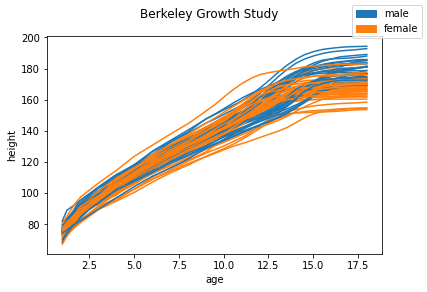

In [14]:
#plot training data hued by sex (growth curves)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify=y,
    random_state=0,
)

# Plot samples grouped by sex
X_train.plot(group=y_train, group_names=categories).show()

C:\Users\George\AppData\Local\Temp\ipykernel_7108\397179766.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  X_test.plot().show()


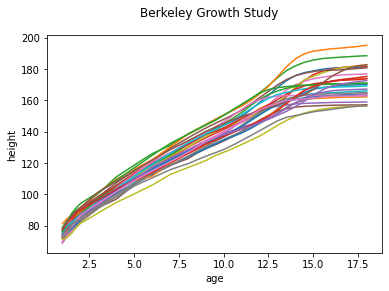

In [15]:
#without hue show the test data
X_test.plot().show()

### Method 1: Maximum Depth Classifier

This method is fully described here in the library.
Depth notions can be found at 'On Maximum depth and Related Classifiers'

In [16]:
depth = MaximumDepthClassifier(depth_method=ModifiedBandDepth())
depth.fit(X_train, y_train)
depth_pred = depth.predict(X_test)
print(depth_pred)
print('The score of Maximum Depth Classifier is {0:2.2%}'.format(
    depth.score(X_test, y_test),
))

[0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1]
The score of Maximum Depth Classifier is 82.14%


### Method 2: K-Nearest Neighbours Classifier

This method is base on the k nearest neighbours in the training set.
The adaptation of this and its use on functional data is achieved by: ??

In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn_pred)
print('The score of KNN is {0:2.2%}'.format(knn.score(X_test, y_test)))

[0 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1]
The score of KNN is 96.43%


### Method 3: Nearest Centroid Classifier

Similar to kNN, except here it will take the two existing centroids and assign which ever is closest.

In [18]:
centroid = NearestCentroid()
centroid.fit(X_train, y_train)
centroid_pred = centroid.predict(X_test)
print(centroid_pred)
print('The score of Nearest Centroid Classifier is {0:2.2%}'.format(
    centroid.score(X_test, y_test),
))

[0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1]
The score of Nearest Centroid Classifier is 85.71%


### Method 4: Functional Quadratic Discriminant

This method assumes the covariance to have a parametric form. Here we assume variance and lengthscales to be 6 and 1 - these should be of the correct order of magnitude, but will then be optimised. If the accuracy is low, it is likely because the covariance cannot be fit with parameters.

The regulariser is in fact making this Regularised discriminant analysis: alpha should be between 0-1, here we go for fine tuning with 0.05.

In [19]:
qda = QuadraticDiscriminantAnalysis(
    ParametricGaussianCovariance(
        Gaussian(variance=6, length_scale=1),
    ),
    regularizer=0.05,
)
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)
print(qda_pred)
print('The score of functional QDA is {0:2.2%}'.format(
    qda.score(X_test, y_test),
))

[0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1]
The score of functional QDA is 96.43%


In [20]:
accuracies = pd.DataFrame({
    'Classification methods':
        [
            'Maximum Depth Classifier',
            'K-Nearest-Neighbors',
            'Nearest Centroid Classifier',
            'Functional QDA',
        ],
    'Accuracy':
        [
            '{0:2.2%}'.format(
                depth.score(X_test, y_test),
            ),
            '{0:2.2%}'.format(
                knn.score(X_test, y_test),
            ),
            '{0:2.2%}'.format(
                centroid.score(X_test, y_test),
            ),
            '{0:2.2%}'.format(
                qda.score(X_test, y_test),
            ),
        ],
})

accuracies

,Classification methods,Accuracy
0,Maximum Depth Classifier,82.14%
1,K-Nearest-Neighbors,96.43%
2,Nearest Centroid Classifier,85.71%
3,Functional QDA,96.43%


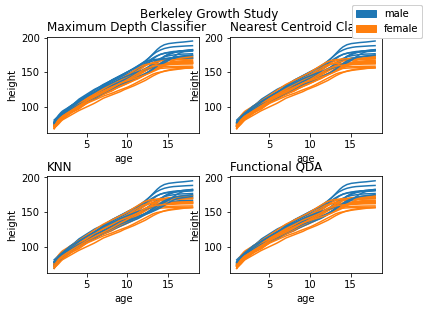

In [21]:
fig, axs = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.45, bottom=0.06)

X_test.plot(group=centroid_pred, group_names=categories, axes=axs[0][1])
axs[0][1].set_title('Nearest Centroid Classifier', loc='left')

X_test.plot(group=depth_pred, group_names=categories, axes=axs[0][0])
axs[0][0].set_title('Maximum Depth Classifier', loc='left')

X_test.plot(group=knn_pred, group_names=categories, axes=axs[1][0])
axs[1][0].set_title('KNN', loc='left')

X_test.plot(group=qda_pred, group_names=categories, axes=axs[1][1])
axs[1][1].set_title('Functional QDA', loc='left')

plt.show()

## FPCA on Berkeley Growth Study

In [28]:
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
    FourierBasis,
    MonomialBasis,
)

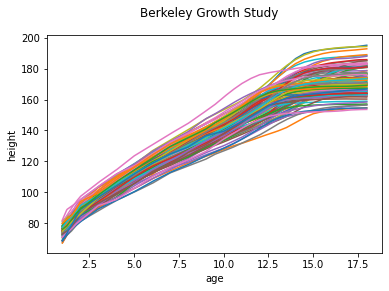

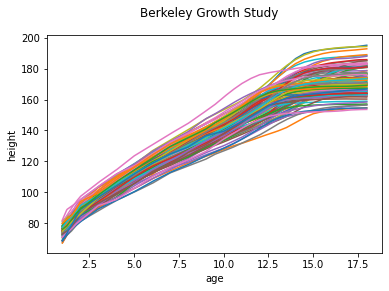

In [24]:
dataset = fetch_growth()
fd = dataset['data'] #FDataGrid
y = dataset['target'] #categories
fd.plot()

### Discretised FCPA - without BSpline

This can therefore be applied if BSpline smoothing has already been carried out...

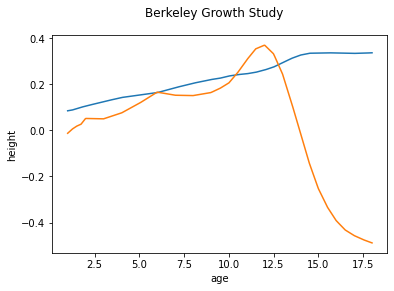

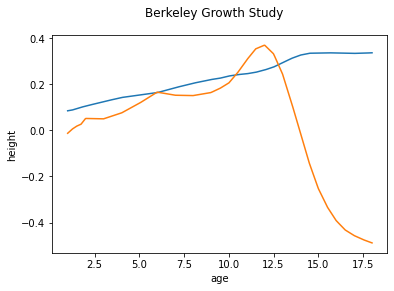

In [29]:
#2 Components in FPCA - just pass FDataGrid
fpca_discretized = FPCA(n_components=2)
fpca_discretized.fit(fd)
fpca_discretized.components_.plot()

### FDataBasis
Here the basis used is a BSplineBasis as described: https://github.com/GAA-UAM/scikit-fda/blob/master/skfda/representation/basis/_bspline_basis.py

The order will default to 4 (cubic splines) and the order or the number of basis functions can be used. Note that if the number of basis functions are specified, the knots will by default be evenly spaced (probably fine..).

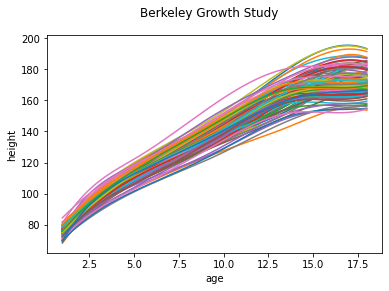

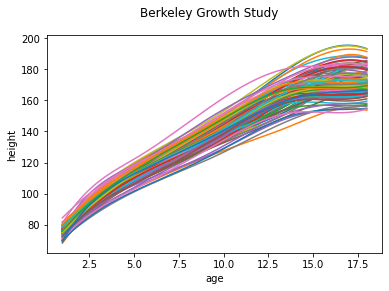

In [32]:
#perform BSpline smoothing
from skfda.representation.basis import BSplineBasis

dataset = fetch_growth()
fd = dataset['data']
basis = BSplineBasis(n_basis=7)
basis_fd = fd.to_basis(basis)
basis_fd.plot()

In [33]:
basis_fd

FDataBasis(
    basis=BSplineBasis(domain_range=((1.0, 18.0),), n_basis=7, order=4, knots=(1.0, 5.25, 9.5, 13.75, 18.0)),
    coefficients=[[ 81.62184377  95.32753609 122.2487525  142.51904585 184.48664294
      199.4720117  193.26470272]
     [ 76.82387771  94.30494976 113.90201189 141.02004067 150.21453901
      177.65529306 178.70330065]
     [ 77.58910292  90.54722502 111.01024139 129.36125539 155.59740349
      176.40598876 170.17572555]
     [ 74.58592798  97.30148012 111.46408202 139.36659537 160.75057757
      189.48452894 180.05249928]
     [ 74.34003046  85.38726311 107.13999049 130.25472739 157.51640746
      178.92214655 171.22214901]
     [ 77.08381416  89.94697808 114.54100512 133.60614578 157.71863811
      178.40595159 172.36170236]
     [ 73.13251635  89.67998806 113.02559752 137.90195028 149.94684293
      175.84140668 171.70970635]
     [ 75.05244064  95.6801746  116.61117871 138.66735411 174.66040512
      188.69631115 184.23025242]
     [ 76.89980835  98.95253797 1

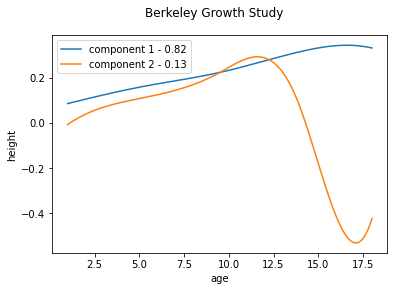

In [59]:
#FPCA from fbsplinedata
fpca = FPCA(n_components=2)
fpca.fit(basis_fd)
fpca.components_.plot()
plt.legend(labels=['component 1 - {:.2f}'.format(fpca.explained_variance_ratio_[0]),'component 2 - {:.2f}'.format(fpca.explained_variance_ratio_[1])])

### Plot
To better understand the plots, we can add and subtract a multiple of each of the components from the mean of all the curves. The factor 30 determines by how much we add and subtract.

This may not be effective in some data, where there a large differences between the individual curves.

#### Other basis
Other bases could be used for the FPCA:
- **Fourier** would be appropriate for a periodic type functions
- **Monomial** may be appropriate for very simple cases, likely to supress features

Monomial : {1,X,X2,X3} as the base for the vector space

Not Monomial : {1,1+X,X+X2,X3} as the base for vector space

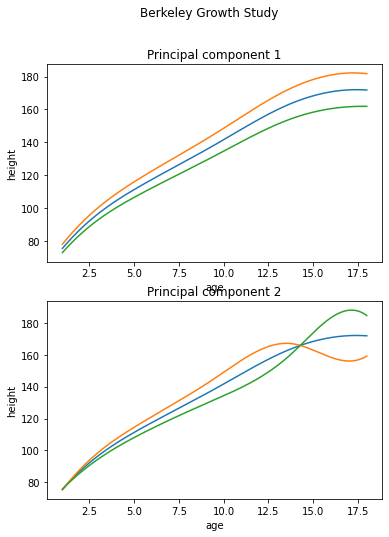

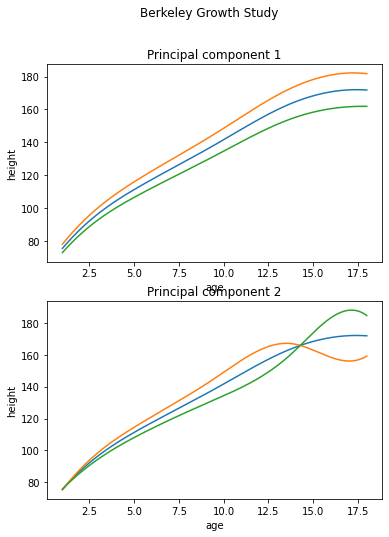

In [39]:
FPCAPlot(
    basis_fd.mean(),
    fpca.components_,
    factor=30,
    fig=plt.figure(figsize=(6, 2 * 4)),
    n_rows=2,
).plot()

## FPCA scores
Code method to splot FPCA scores on axis PC1 and PC2
Also - how much of the variation in the data is explained by PC1 and PC2?

In [48]:
import seaborn as sns

In [53]:
print(fpca.explained_variance_ratio_)

[0.81827598 0.13471056]


If you want the correct labels in legend, it should be ['male','male','male'...'female'] as the hue.

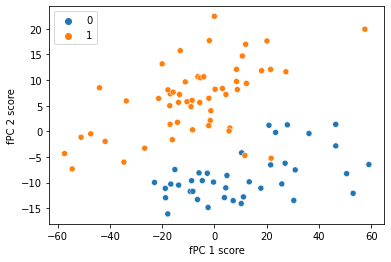

In [57]:
scores = fpca.fit_transform(basis_fd)
sns.scatterplot(x=scores[:, 0], y=scores[:, 1],hue = y)
plt.xlabel("fPC 1 score")
plt.ylabel("fPC 2 score")
plt.title("")
plt.show()

Here other ML clustering and classification methods could also be used.